In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.chdir('/Users/davidmiles-skov/Desktop/special_courses/materials_characterization/xrd_analysis/AutoXRD') # change working directory to root folder
import seaborn as sns
sns.set_theme()

In [2]:
# utils
from utils.grid_handlers import measurement_grid
from utils.data_loaders import read_XRD
from utils.plotting import plot_grid, plot_data

Taking a look at Anat's data

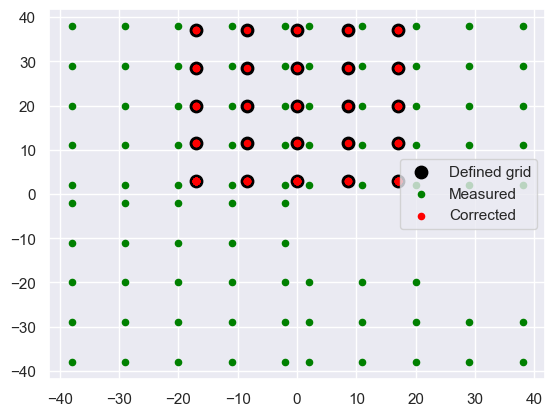

In [3]:
# NOTE: Taking some code from 'intern-data-handling'

#  Not 100% sure what all of this is doing

grid = measurement_grid(5,5,34,34,-17,3) # BR_map 3mm margin (back sample)

# Load from path

path = 'data/anait_0016_Ba_all.txt'
initial_data, coords = read_XRD(path, grid, n = 100, separator = "\t")
plot_grid(coords,grid)

In [4]:
datatype_y= 'Intensity (counts)'
datatype_x='2θ (°)'

# plot_data(initial_data, datatype_x, datatype_y,plotscale = 'log')
# display(initial_data)

It appears that Anat's data is probably formatted in a different way than Lena's

In [5]:
# Dictionary to store individual DataFrames
dfs = {}

# Loop over unique coordinates in the MultiIndex columns
for coord in initial_data.columns.get_level_values(0).unique():
    # Select columns belonging to the coordinate
    dfs[coord] = initial_data[coord]  # This keeps the second level ('Data type')

# Check one of the split DataFrames
print(dfs.keys())  # List of coordinate names

dict_keys(['-17.0,3.0', '-8.5,3.0', '0.0,3.0', '-17.0,11.5', '-8.5,11.5', '0.0,11.5', '-17.0,20.0', '-8.5,20.0', '0.0,20.0', '-17.0,28.5', '-8.5,28.5', '0.0,28.5', '-17.0,37.0', '-8.5,37.0', '0.0,37.0', '8.5,3.0', '17.0,3.0', '8.5,11.5', '17.0,11.5', '8.5,20.0', '17.0,20.0', '8.5,28.5', '17.0,28.5', '8.5,37.0', '17.0,37.0'])


In [6]:
# Inspecting first df
col_1 = list(dfs.keys())[0]

print(dfs[col_1])
# Drop the "Data type" thing
dfs[col_1].columns.name = None


Data type  2θ (°)  Intensity (counts)  2θ (°)  Intensity (counts)  2θ (°)  \
0           15.00            409.0166   15.00            430.3639   15.00   
1           15.01            407.6708   15.01            425.1343   15.01   
2           15.02            406.1328   15.02            419.1576   15.02   
3           15.03            405.5370   15.03            413.7518   15.03   
4           15.04            408.5557   15.04            410.5355   15.04   
...           ...                 ...     ...                 ...     ...   
6996          NaN                 NaN     NaN                 NaN     NaN   
6997          NaN                 NaN     NaN                 NaN     NaN   
6998          NaN                 NaN     NaN                 NaN     NaN   
6999          NaN                 NaN     NaN                 NaN     NaN   
7000          NaN                 NaN     NaN                 NaN     NaN   

Data type  Intensity (counts)  2θ (°)  Intensity (counts)  2θ (°)  \
0     

In [7]:
print(dfs[col_1].isna().sum())  # Count missing values per column
dfs[col_1].dropna(inplace=True)
print(dfs[col_1])  # Should show fewer rows if NaNs existed


2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
dtype: int64
      2θ (°)  I

/var/folders/0h/y4r0kpjd647_xv_scm0kjtvr0000gn/T/ipykernel_97595/3827901867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[col_1].dropna(inplace=True)


Index(['2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)'],
      dtype='object')
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5491, 5492, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5500],
      dtype='int64', length=5501)


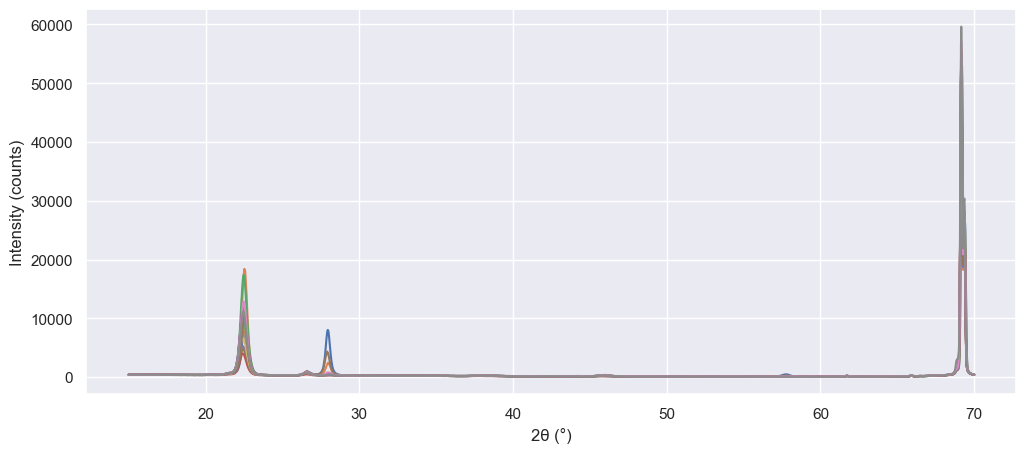

In [8]:
# Now, inspect
print(dfs[col_1].columns)  # Check columns
print(dfs[col_1].index)  # Check index

# Now, we can plot the data
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(dfs[col_1][datatype_x], dfs[col_1][datatype_y])
ax.set_xlabel(datatype_x)
ax.set_ylabel(datatype_y)
plt.show()


Finding peaks

In [9]:
two_thetas = dfs[col_1][datatype_x].values
# Make all 2-thetas are the same for each run
print(len(two_thetas))
print(np.unique(two_thetas).shape)

5501
(5501,)


In [10]:
# They are - merge 2-theta columns

theta_column = dfs[col_1].iloc[:, 0]  # Take the first '2θ (°)' column
theta_column.name = '2_theta'
# Extract intensity columns
intensity_columns = dfs[col_1].iloc[:, 1::2]  # Select every second column (intensity values)

intensity_columns.columns = [f'Intensity_{i+1}' for i in range(intensity_columns.shape[1])]
dfs[col_1] = pd.concat([theta_column, intensity_columns], axis=1)
print(dfs[col_1].head())


   2_theta  Intensity_1  Intensity_2  Intensity_3  Intensity_4  Intensity_5  \
0    15.00     409.0166     430.3639     405.7600     419.8746     399.0924   
1    15.01     407.6708     425.1343     408.4317     422.6560     401.6999   
2    15.02     406.1328     419.1576     411.4851     425.8348     404.6798   
3    15.03     405.5370     413.7518     414.6375     427.5334     407.5671   
4    15.04     408.5557     410.5355     418.1695     423.5537     410.0992   

   Intensity_6  Intensity_7  Intensity_8  Intensity_9  Intensity_10  \
0     422.0590     409.0271     422.3941     407.7689      426.6519   
1     420.3357     414.1555     429.9001     415.7967      431.4223   
2     418.3662     420.0164     438.4783     424.9713      436.8743   
3     416.5797     423.7450     443.5609     430.5141      439.0883   
4     415.4948     419.2941     435.2349     422.1259      428.8821   

   Intensity_11  Intensity_12  Intensity_13  Intensity_14  Intensity_15  \
0      431.9617      41

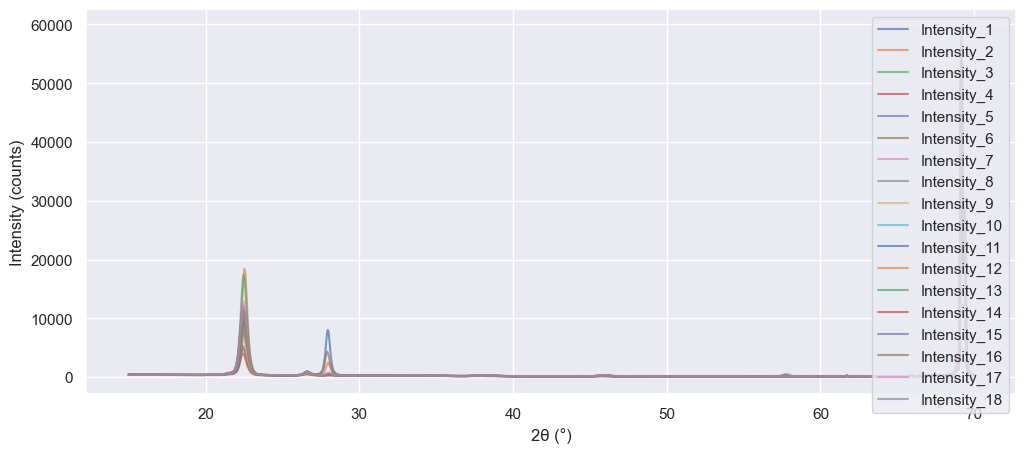

In [11]:
# Plot again
fig, ax = plt.subplots(figsize=(12, 5))
for col in intensity_columns.columns:
    ax.plot(dfs[col_1]['2_theta'], dfs[col_1][col], label=col, alpha=0.7)
ax.set_xlabel(datatype_x)
ax.set_ylabel(datatype_y)
plt.legend()
plt.show()


Really simple peak detection

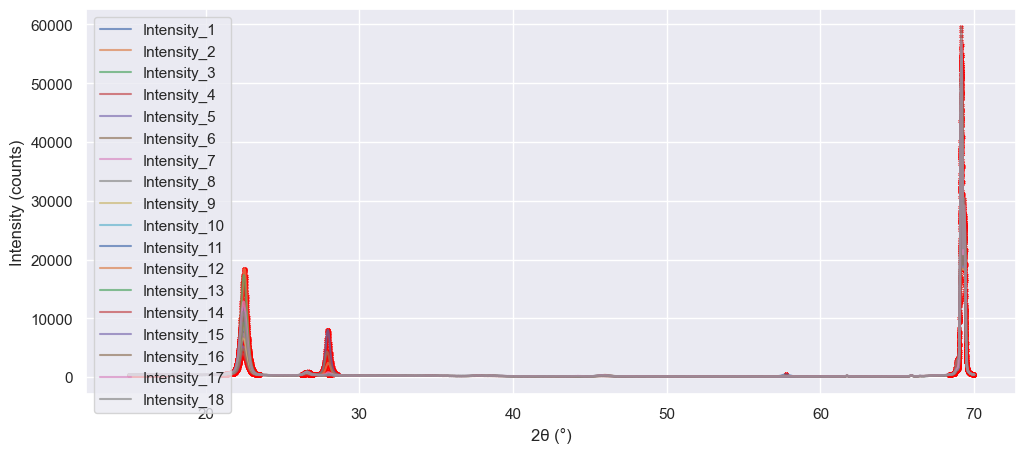

In [12]:
# Very simple peak detection - using IQR as a threshold
def peak_detection_iqr(intensities, threshold=0.5):
    q75, q25 = np.percentile(intensities, [75, 25])
    iqr = q75 - q25
    return np.where(intensities > q75 + threshold * iqr)[0] # Return indices of peaks

# Apply peak detection to all intensity columns
peaks = {}
for col in intensity_columns.columns:
    peaks[col] = peak_detection_iqr(dfs[col_1][col].values)

# Plot again
fig, ax = plt.subplots(figsize=(12, 5))
for col in intensity_columns.columns:
    ax.plot(dfs[col_1]['2_theta'], dfs[col_1][col], label=col, alpha=0.7)
    ax.scatter(dfs[col_1]['2_theta'].iloc[peaks[col]], dfs[col_1][col].iloc[peaks[col]], color='red', s=5, marker='x')
ax.set_xlabel(datatype_x)
ax.set_ylabel(datatype_y)
plt.legend()
plt.show()



Using scipy

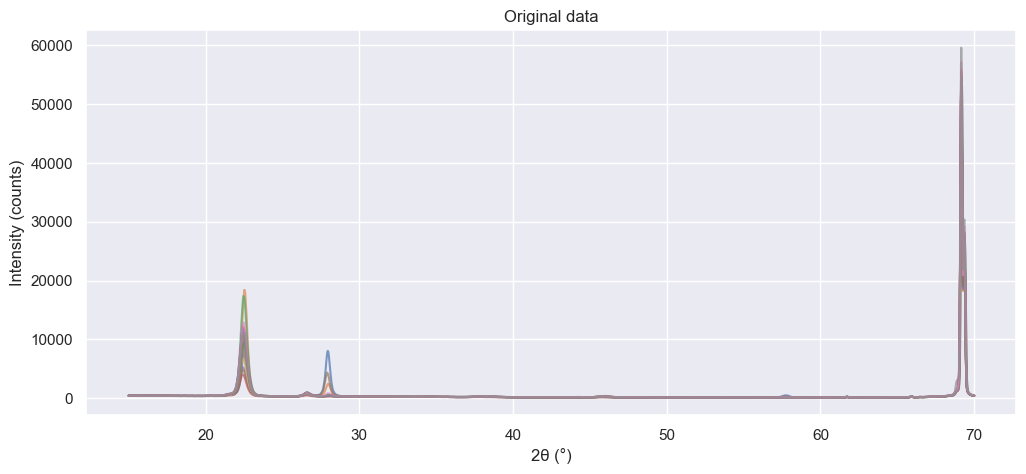

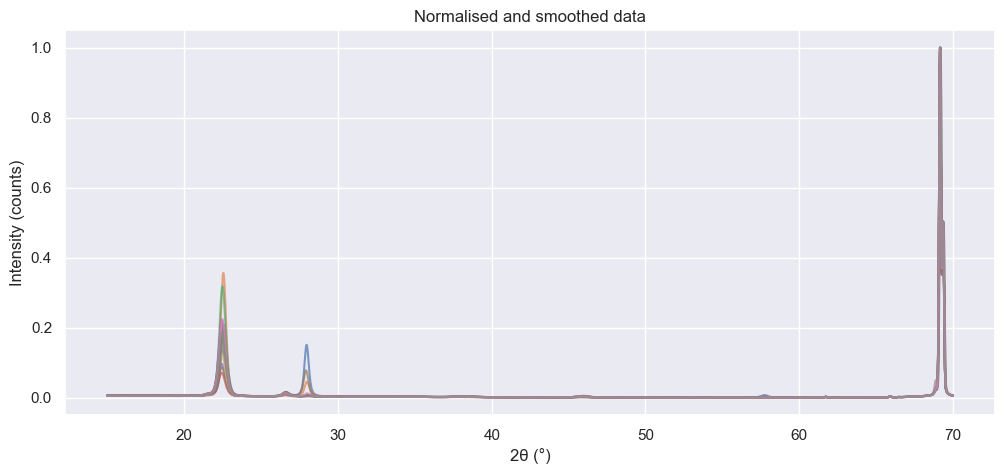

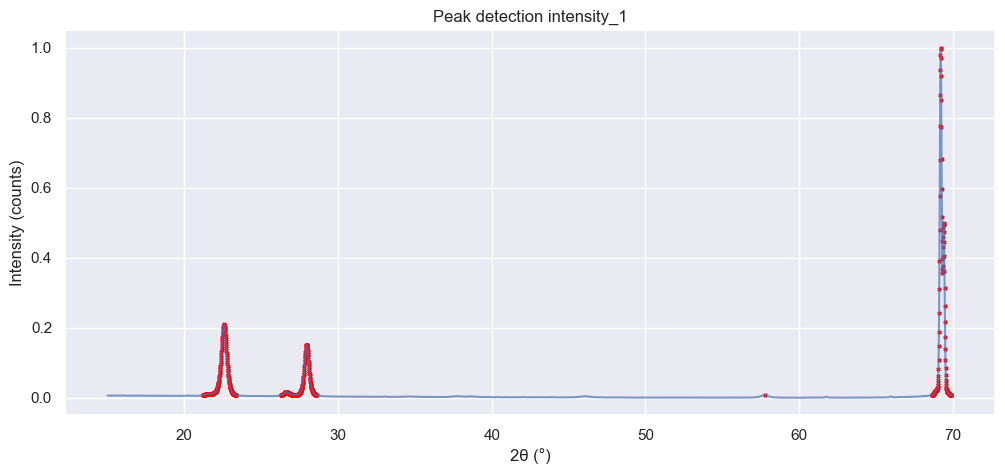

In [17]:
from scipy.signal import find_peaks, peak_widths
from utils.smooth import savgol_smooth

# Plot original data
fig, ax = plt.subplots(figsize=(12, 5))
for col in intensity_columns.columns:
    ax.plot(dfs[col_1]['2_theta'], dfs[col_1][col], label=col, alpha=0.7)
ax.set_xlabel(datatype_x)
ax.set_ylabel(datatype_y)
plt.title('Original data')
plt.show()

# Let's just consider col_1

df1 = dfs[col_1].copy()

# Preprocessing - Normalise and smooth
for col in df1.columns[1:]:
    df1[col] = savgol_smooth(df1[col].values, window_size=11, poly_order=3)  # Smooth
    df1[col] = (df1[col] - df1[col].min()) / (df1[col].max() - df1[col].min())  # Normalise

# Plot again
fig, ax = plt.subplots(figsize=(12, 5))
for col in df1.columns[1:]:
    ax.plot(df1['2_theta'], df1[col], label=col, alpha=0.7)
ax.set_xlabel(datatype_x)
ax.set_ylabel(datatype_y)
plt.title('Normalised and smoothed data')
plt.show()


# Peak detection parameters
peak_threshold = None  # No explicit threshold
min_peak_width = 8      # Minimum width requirement

# Try peak detection
# peaks, _ = find_peaks(df1['Intensity_1'], height=peak_threshold, width=min_peak_width)
# peak_widths(df1['Intensity_1'], peaks, rel_height=0.5)

peak_idx = peak_detection_iqr(df1['Intensity_1'], threshold=0.5)


# Plot again - Only first intensity column
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df1['2_theta'], df1['Intensity_1'], label='Intensity_1', alpha=0.7)
# ax.scatter(df1['2_theta'].iloc[peaks], df1['Intensity_1'].iloc[peaks], color='red', s=5, marker='x')
ax.scatter(df1['2_theta'].iloc[peak_idx], df1['Intensity_1'].iloc[peak_idx], color='red', s=5, marker='x')
ax.set_xlabel(datatype_x)
ax.set_ylabel(datatype_y)
plt.title('Peak detection intensity_1')
plt.show()

